# Networks AKA Graphs

The graph is the mathematical object representing a network. This is powerful because it can represent any kind of structure where relations between objects matter. Examples:

- Social networks (Facebook friends, Twitter followers, etc.)
- Structural networks (internet hyperlink graph, transportation networks, matching markets, etc.)
- Interaction networks (Mastercard's transaction network, word co-occurence networks in NLP, chemical interaction networks)
- Tree networks. For instance the decisions you can possibly take in chess can be modeled as a [decision tree](https://en.wikipedia.org/wiki/Decision_tree). 

Because of this flexibility, graphs are used all over the place in computer science.

- Neural networks are based on a graph model (hence the "network" part).
- Most social apps depend (critically) on their user network.
- Most game AIs are based around [tree search](https://en.wikipedia.org/wiki/Game_tree). 
- They're also used to model disease diffusion and contagion, etc.

We're using [networkX library](https://networkx.github.io/documentation/stable/) which is good for small to medium sized graphs. 

_You will need to install it locally._ 

```
pip install networkx
```

Let's start by drawing the [petersen graph](https://en.wikipedia.org/wiki/Petersen_graph):

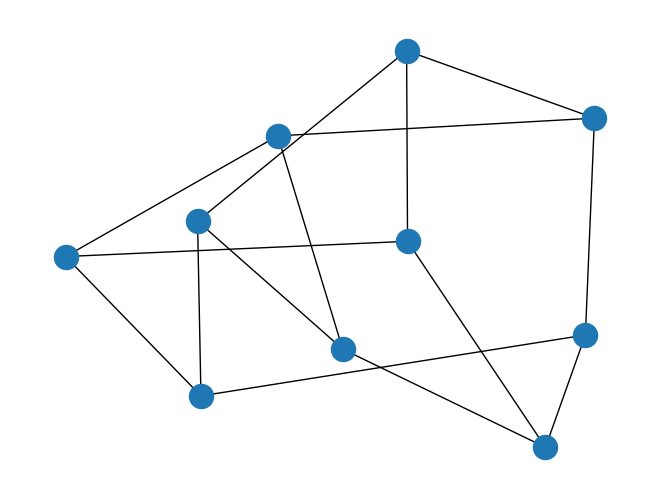

In [1]:
# import dependency
import networkx as nx 
# draw peterson graph

G = nx.petersen_graph()
nx.draw(G)

We immediately notice that graphs are complex objects. 

If we draw the Petersen Graph differently a much clearer structure emerges:

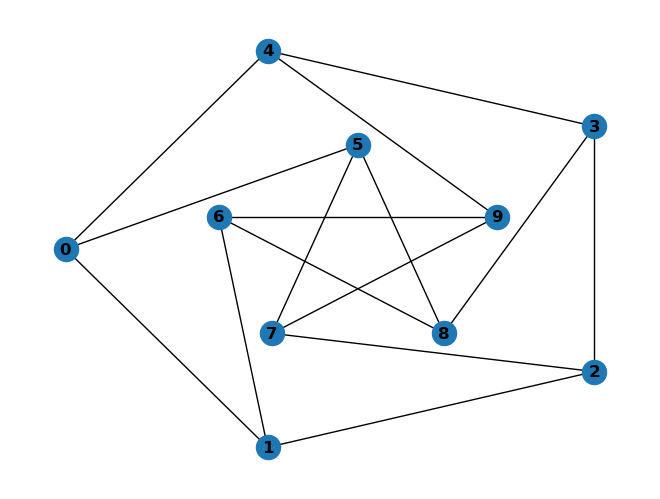

In [2]:
# peterson graph: take 2

nx.draw_shell(
    G,
    nlist=[range(5,10), range(5)],
#     range (5,10) are connected, range(5) are connected
    with_labels=True,
    font_weight='bold'
)

# Drawing graphs exactly the same way is not an easy job

A graph is made of two types of data.

## Types of data

**Nodes**

- Nodes, sometimes called **vertices**, are the endpoints. In a social networks there would be one per user. 
- Nodes can have types or other associated data.

**Edges**

- Edges are the relations between nodes.
- Edges can have a direction (from node A to node B) or not (go both ways).
- Edges can also have **weights** (a number attached to the edge).

For example, you could attach the number of interactions between two users to their edge in a social network. This way users who are close friends would be "more attached" than mere acquaintances.

We generally make a clear distinction between **directed graphs** (graphs with directed edges) and **undirected graphs** (graphs where all edges go both ways). This is because the algorithms are generally specialized.

An undirected edge in a directed graph is generally represented by two edges (one for each direction). A directed graph is depicted in networkX with "arrow edges":

In [3]:
nx.graph?
nx.digraph?

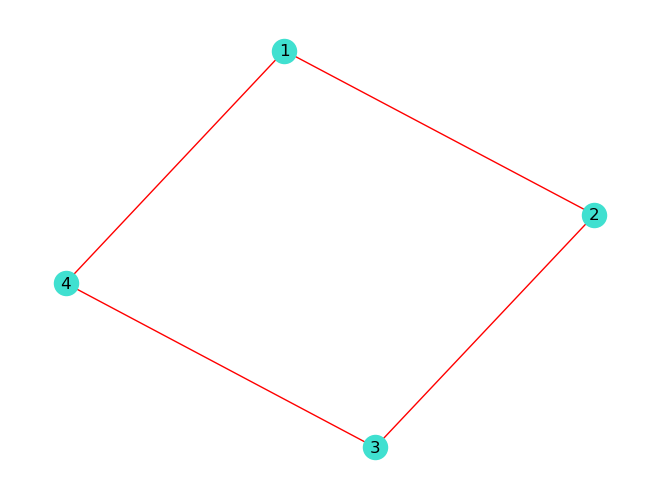

In [4]:
# Making a graph from edges list
# This is a square
G = nx.Graph([
    (1,2),
    (2,3),
    (3,4),
    (4,1)
]) #Standard to call graph capital letter


nx.draw(G,node_color='turquoise',edge_color='red',with_labels=True)

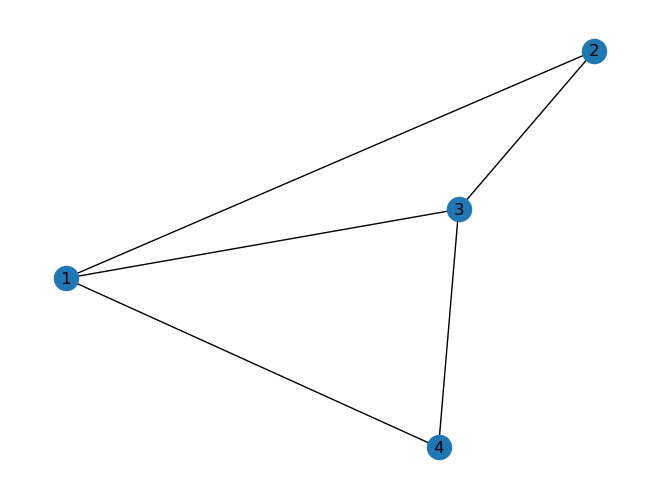

In [5]:
# Add a diagonal edge

G.add_edge(1,3)

nx.draw(G, with_labels=True)

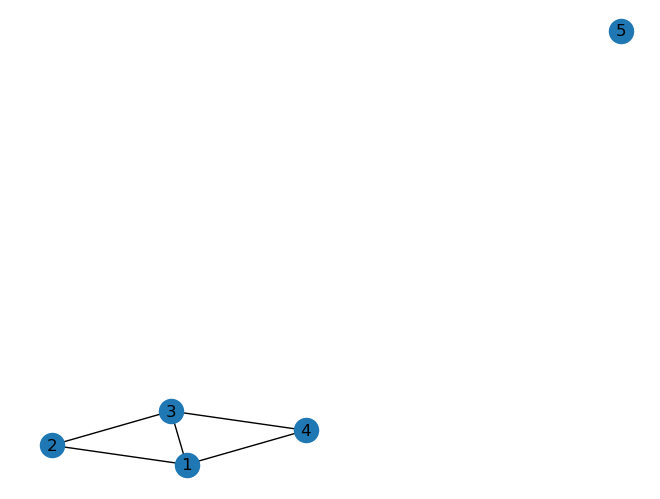

In [6]:
# Add a 5th node and an edge

G.add_node(5)

nx.draw(G, with_labels=True)

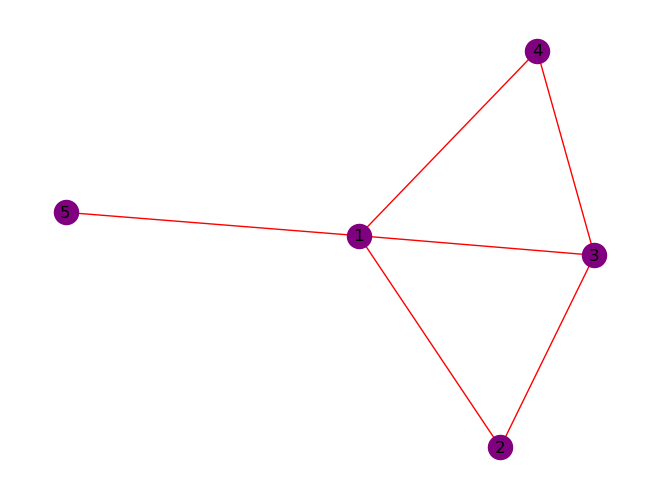

In [7]:
G.add_edge(5,1)

nx.draw(G,edge_color='r',node_color='purple', with_labels=True)

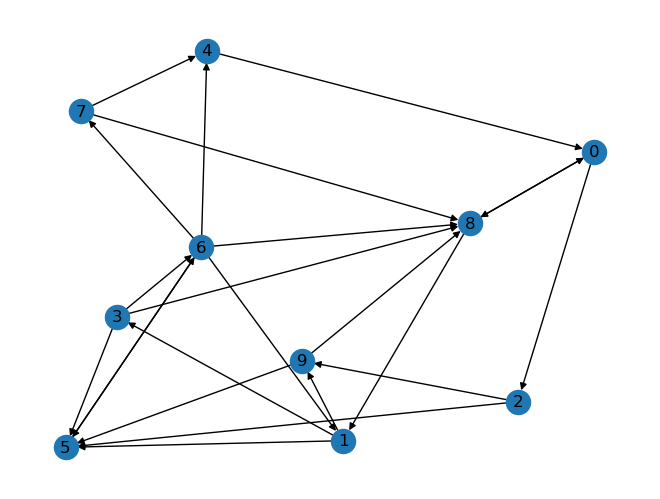

In [8]:
# binomial graph
G = nx.binomial_graph(10, 0.3, directed=True) #seed=10 - notes stay connected as graph changes
nx.draw(G,with_labels=True)

In NetworkX, we access a node by its **Node ID** (normally a number, but can be anything). This is used with the `[]` bracket operator, like lists or dicts:

In [9]:
# access node
G[3]
#Directed will also impact nodes that are being returned here. 

AtlasView({5: {}, 6: {}, 8: {}})

In [10]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

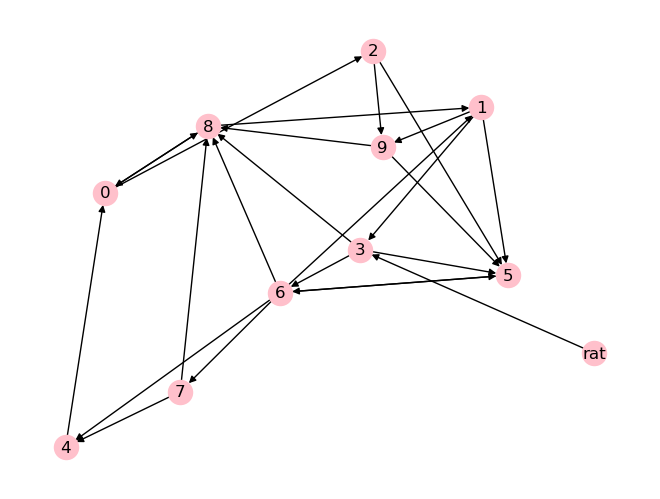

In [11]:
# Can add str node

G.add_node('rat')
G.add_edge('rat',3)
nx.draw(G,with_labels=True,node_color='pink')

In [12]:
G[0] # Shows the nodes to which it is connected directionally.

AtlasView({2: {}, 8: {}})

In [13]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'rat'))

## Edge List representation

- The edge list is a simple way to represent a graph as a list of $(source, destination)$ tuples
- We can also view the **edge list** directly:

In [14]:
# view edge list
G.edges

OutEdgeView([(0, 2), (0, 8), (1, 3), (1, 5), (1, 9), (2, 5), (2, 9), (3, 5), (3, 6), (3, 8), (4, 0), (5, 6), (6, 1), (6, 4), (6, 5), (6, 7), (6, 8), (7, 4), (7, 8), (8, 0), (8, 1), (9, 5), (9, 8), ('rat', 3)])

## Adjacency Matrix representation

A common way to represent a graph is with an [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) -- a matrix where each row and each column represent a node, and the entry is 0 if there's no edge and 1 if there is an edge:

In [15]:
# adjacency matrix
import numpy as np 

nx.adjacency_matrix(G) 

nx.adjacency_matrix(G).todense()

# Supposed to give back a matric with connection between each node (0 or 1)


C:\Users\Simona\AppData\Local\Temp\ipykernel_9388\3555551624.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G)
C:\Users\Simona\AppData\Local\Temp\ipykernel_9388\3555551624.py:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.adjacency_matrix(G).todense()


matrix([[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [16]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'rat'))

In [17]:
G['rat']

AtlasView({3: {}})

Note:

- If the edges had weights, the $1$ entries would be replaced with the edge-weight instead.
- Adjacency matrices, though they represent a graph, are valid matrices so all of [linear algebra](https://en.wikipedia.org/wiki/Linear_algebra) is valid.

For instance, one aspect of matrices which is important is the [eigenvalues](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) and the eigenvalues of a graph's matrix is a topic which is heavily studied.

## Graph search

Our first hands-on application on graphs will be to implement some simple [graph traversal](https://en.wikipedia.org/wiki/Graph_traversal) algorithms. 

The two basic search algorithms are [Breadth-first search](https://en.wikipedia.org/wiki/Breadth-first_search) (BFS) and [depth-first search](https://en.wikipedia.org/wiki/Depth-first_search) (DFS).

Graph traversal can be used for lots of things:

- Discover if a graph is connected or not (eg. if you can always get from one node to another)
- Generate driving directions (eg. find the optimal path from A to B)
- Compute clusters or connected components on a graph

To learn BFS, we first have to learn about queues.

### The queue and data structures

The queue is our first encounter with what computer scientists call a **data structure**. 

A [data structure](https://en.wikipedia.org/wiki/Data_structure) is a logical way to organize and operate on data. 

The **queue** acts like a list, but has one main rule called **First In/First Out**. This means the following rules apply:

- You can only ever add data to a queue one object at a time
- If you remove an object it has to be the one at the front of the queue (the one added the earliest)

Lists be represented with `list.pop(0)` in python.

In [18]:
class Queue:
    def __init__(self):
        self.elements = []

    def enqueue(self, data):
        self.elements.append(data)
        return data

    def dequeue(self):
        return self.elements.pop(0)

    def rear(self):
        return self.elements[-1]

    def front(self):
        return self.elements[0]

    def is_empty(self):
        return len(self.elements) == 0
    
    def info(self):
        return self.elements

### Stack data structure

The stack is the inverse of the Queue data structure, it's a **Last In/First Out** model. So when removing from a stack, we remove the most recently added element instead. - ie .pop(-1) rather than 0

In [19]:
class Stack: 
    def __init__(self): 
        self.elements = [] 
    
    def push(self, data): 
        self.elements.append(data) 
        return data 
    
    def pop(self): 
        return self.elements.pop() 
        
    def peek(self): 
        return self.elements[-1] 
        
    def is_empty(self): 
        return len(self.elements) == 0
    
    def info(self):
        return self.elements

## Breadth-First Search

BFS explores the graph in "layers" around the node where we start the search. It first looks at all nodes 1 level away from the start node, then all nodes 2 levels away, etc. until we find all connected nodes to the starting node or ask it to stop.

Here is the **BFS pseudocode**

```
let L be a list of explored nodes
Mark the origin node S as explored
Let Q be a queue initialized with S
While Q is not empty:
  remove first node of Q, call it V
  for each edge (v, w):
    if w is not explored:
      mark w as explored
      add w to the end of Q
```

In [20]:
#Adjacency list

graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [21]:
def breadth_first_search(graph, start):
    queue = Queue()
    queue.enqueue(start)
    path = []

    while not queue.is_empty():
        vertex = queue.dequeue()
        if vertex in path:
            continue
        path.append(vertex)
        for neighbor in graph[vertex]:
            queue.enqueue(neighbor)

    return path

breadth_first_search(graph,'D')

['D', 'B', 'E', 'A', 'F', 'C']

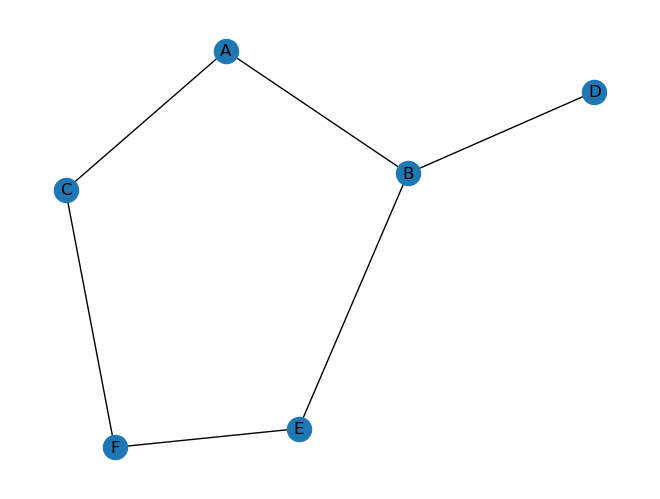

In [22]:
nx.draw(nx.Graph(graph),with_labels=True)

## More Complex Example

['A', 'B', 'C', 'D', 'E', 'F', 'H', 'G']

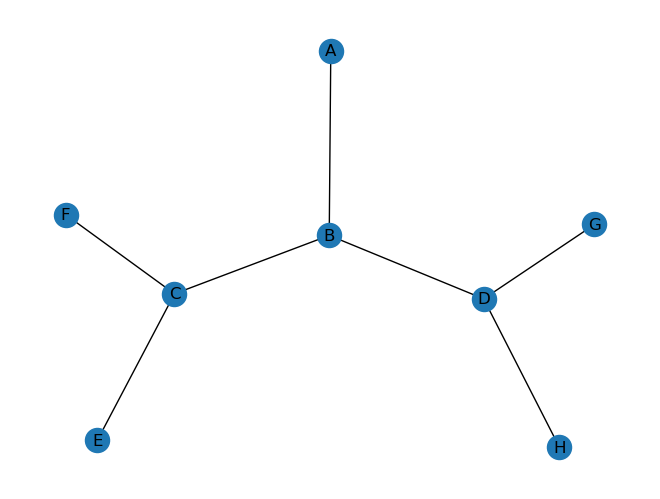

In [23]:
graph2 = {'A': set(['B']),
         'B': set(['A', 'C', 'D']),
         'C': set(['B', 'E','F']),
         'D': set(['B','G','H']),
         'E': set(['C']),
         'F': set(['C']),
         'G': set(['D']),
         'H': set(['D'])}

nx.draw(nx.Graph(graph2),with_labels=True)

breadth_first_search(graph2,'A')

## Depth-First Search

[DFS](https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/) is the opposite of BFS. It picks an edge from the origin node, then descends as deeply as possible down that path until it gets blocked. Then it backtracks to the second edge connected to our original node and does the same. (Deeper first) 

In [24]:
def depth_first_search(graph, start):
    stack = Stack()
    stack.push(start)
    path = []

    while not stack.is_empty():
        vertex = stack.pop()
        if vertex in path:
            continue #skips the rest of the code inside a loop for the current iteration only. Loop doesn't terminate 
        path.append(vertex)
        for neighbor in graph[vertex]:
            stack.push(neighbor)

    return path

depth_first_search(graph,'D')

['D', 'B', 'A', 'C', 'F', 'E']

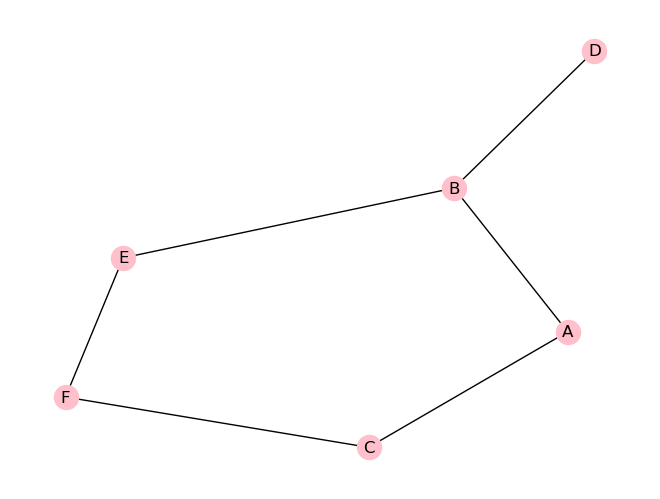

In [25]:
nx.draw(nx.Graph(graph),with_labels=True,node_color='pink')

## More Complex Example

['A', 'B', 'D', 'G', 'H', 'C', 'F', 'E']

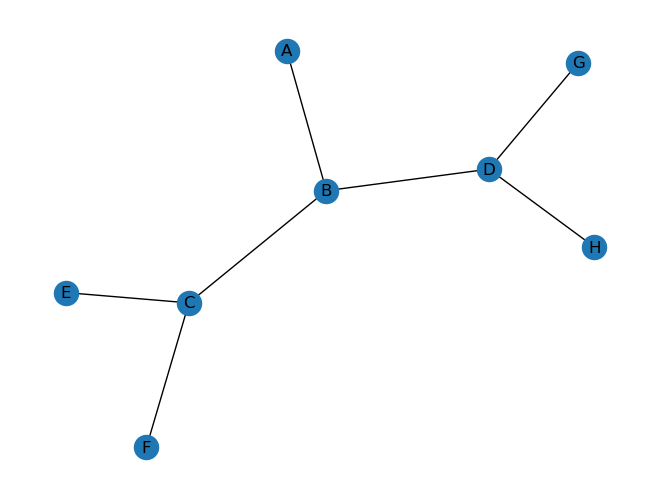

In [26]:
graph2 = {'A': set(['B']),
         'B': set(['A', 'C', 'D']),
         'C': set(['B', 'E','F']),
         'D': set(['B','G','H']),
         'E': set(['C']),
         'F': set(['C']),
         'G': set(['D']),
         'H': set(['D'])}

nx.draw(nx.Graph(graph2),with_labels=True)

depth_first_search(graph2,'A')